In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('dark')

# Pitching WAR

## A note about fWAR

So far, I haven't really mentioned the different types of WAR. That's because batting value is relatively agreed upon, using wOBA (which will be another notebook). Different versions of WAR have somewhat different ways of valuing pitchers, however. Let's compare WAR from Fangraphs (fWAR), and WAR from Baseball Reference (bWAR).

bWAR is calculated based on the RA9, or runs allowed per nine innings. This is similar to the old-school metric of ERA, minus some disagreement on errors and responsibility for runners after the pitcher is pulled. It's the same basic idea though: a pitcher's goal is to not give up runs, so his value is tied to that. bWAR values what actually happened in the games.

fWAR is calculated based on FIP. The formula for FIP is

FIP = (13 x (Home Runs) + 3 x (Walks) - 2 x (Strikeouts))/(Innings Pitched) +  FIP constant

So let's break that apart. Strikeouts: good. Walks: bad. Homeruns: very bad. What FIP is trying to do is only account for the aspects of the game that only involve the pitcher and the hitter. These three results are often referred to as Three True Outcomes. 

This is used under the idea that there is a lot of noise in what happens to balls in play, and using that would not represent the pitchers skill. For example, a pitcher having a 9 gold-glove caliber defenders would have less runs scored against him compared to a pitcher having 9 horrible defenders even if all the balls landed in the exact same places. It also attempts to limit luck on calculating value. A line drive straight to the left fielder may prevent a run that a line drive 10 feet to the right would score, but is there a difference in pitcher skill at that point? fWAR values the skill the pitcher has in the games. 

In general, comparing FIP to RA/9 can be useful in seeing unlucky pitchers who have good peripherals, but bad results. It can be thought of as fWAR is a good way predictor of pitcher talent going forward, but bWAR is valid for trying to measure what actually happened in the past.

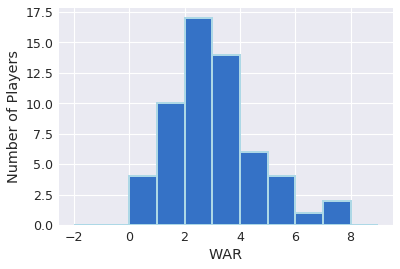

In [6]:
AllPitchers= pd.read_csv('FangraphsPitchers.csv')

QualifiedPitchers = AllPitchers[AllPitchers['IP'] >= 162]
QualifiedPitchers.columns
QualifiedPitchers = QualifiedPitchers.set_index('playerid')

QualifiedPitchers.WAR.hist(bins=np.arange(-2,10,1), edgecolor='lightblue', linewidth=2)
plt.xlabel('WAR')
plt.ylabel('Number of Players')
plt.show()

This histogram gives us similar results to the batters.

In [7]:
NumberPlayers, NumberStats = QualifiedPitchers.shape
Median = NumberPlayers/2

QualifiedPitchers[int(Median):int(Median)+1]

,Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR
playerid,,,,,,,,,,,,,,,,,,,
13183,Zach Davies,Brewers,17,9,0,33,33,191.1,5.83,2.59,0.94,0.302,74.2 %,50.2 %,12.0 %,3.9,4.22,4.42,2.8


In [10]:
QualifiedPitchers[-1:]

,Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR
playerid,,,,,,,,,,,,,,,,,,,
4371,Jeremy Hellickson,- - -,8,11,0,30,30,164.0,5.27,2.58,1.92,0.246,66.3 %,34.9 %,15.1 %,5.43,5.77,5.51,0.2


In [12]:
QualifiedPitchers[0:1]

,Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR
playerid,,,,,,,,,,,,,,,,,,,
10603,Chris Sale,Red Sox,17,8,0,32,32,214.1,12.93,1.81,1.01,0.301,78.4 %,38.7 %,12.1 %,2.9,2.45,2.65,7.7
